### Import important Library.

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
warnings.filterwarnings("ignore")
from tensorflow.keras import Sequential

In [2]:
#Read the file
df=pd.read_csv("review_clean.csv")

In [3]:
#Showing first five rows of dataframe
df.head(5)

,Unnamed: 0,id,keyword,location,text,target,clean_text
0,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this May ALLAH For...
1,1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada
2,2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...
3,3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive evacuation orders in California
4,4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby as smoke fr...


In [4]:
# Extracting the independent variables and dependent Variables/=
tweet=df["clean_text"].tolist()
target=df["target"].tolist()
print(tweet[0:5])
print(target[0:5])

In [6]:
training=int(len(df)*0.8)
testing=int(len(df)-training)
print("Total Number of tweet in training set {} \nTotal Number of tweet in testing set {}".format(training,testing))

Total Number of tweet in training set 6090 
Total Number of tweet in testing set 1523


### Spliting the Data

In [16]:
#Splitting the data into trainset and testset in ratio(80:20)
train=tweet[0:training] 
test=tweet[training:]
print(train[:5])
print(test[:5])

['Our Deeds are the Reason of this May ALLAH Forgive us all', 'Forest fire near La Ronge Sask Canada', 'All residents asked to shelter in place are being notified by officers No other evacuation or shelter in place orders are expected', 'people receive evacuation orders in California', 'Just got sent this photo from Ruby as smoke from pours into a school']
['Sinking Fast  Now or Never on North East Unsigned Radio listen at', 'that horrible sinking feeling when youve been at home on your phone for a while and you realise its been on G this whole time', 'Nigga car sinking but he snapping it up for fox ', 'You should delete this one its not an abbandoned nor sinking Thats the darsena of the Castello scaligero di Sirmione', 'that horrible sinking feeling when youve been at home on your phone for a while and you realise its been on G this whole time']


In [8]:
#Splitting the target variable in ratio(80:20)
training_label=target[0:training]
testing_label=target[training:]
print(training_label[:5])
print(testing_label[:5])

[1, 1, 1, 1, 1]
[0, 1, 0, 0, 0]


In [17]:
# Convert traingin label into numpy arrays for use with the network.
training_label=np.array(training_label)
testing_label=np.array(testing_label)
print(training_label[:5])
print(testing_label[:5])

[1 1 1 1 1]
[0 1 0 0 0]


### Tokenizing the Sentence

In [10]:
vocab=1000
embedding_dim=16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"


tokenize=Tokenizer(num_words=vocab, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',oov_token=oov_tok,lower=True,split=' ',char_level=False)
tokenize.fit_on_texts(train)

word_index=tokenize.word_index
sequence=tokenize.texts_to_sequences(train)
training_pad=pad_sequences(sequence, maxlen=max_length, padding=padding_type, truncating=trunc_type)

### Sequencing the word and padding them.

In [11]:
testing_sequences = tokenize.texts_to_sequences(test)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length, 
                               padding=padding_type, truncating=trunc_type)

In [12]:
#In this we can check the padding and sequencing are working  or not.
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(training_pad[1]))
print(train[1])

forest fire near la <OOV> <OOV> <OOV> ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
Forest fire near La Ronge Sask Canada


### Creating the model.

* First we will create sequential layer.
* Then we add Embedding layer.
* We add Convloution layer.
* Now we have to flatten the input for the dense layer. we can use 2 method either Flatten() layer or GlobalAveragePooling1D() layer.
* Then we add Dense layer.
* Later we will compile model with loss_function, activation_function, Matrics type.

In [13]:
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(16, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_cnn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           16000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                1088      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 17,153
Trainable params: 17,153
Non-trainable params: 0
_________________________________________________________________


#### Training the model.

In [14]:
num_epoch =20
history=model_cnn.fit(training_pad, training_label, epochs=num_epoch, validation_data=(testing_padded, testing_label))

Train on 6090 samples, validate on 1523 samples
Epoch 1/20
6090/6090 [==============================] - 4s 630us/sample - loss: 0.6827 - accuracy: 0.5732 - val_loss: 0.6913 - val_accuracy: 0.5345
Epoch 2/20
6090/6090 [==============================] - 1s 188us/sample - loss: 0.6708 - accuracy: 0.5793 - val_loss: 0.6770 - val_accuracy: 0.5345
Epoch 3/20
6090/6090 [==============================] - 1s 111us/sample - loss: 0.6209 - accuracy: 0.6537 - val_loss: 0.6089 - val_accuracy: 0.6776
Epoch 4/20
6090/6090 [==============================] - 1s 103us/sample - loss: 0.5161 - accuracy: 0.7750 - val_loss: 0.5331 - val_accuracy: 0.7485
Epoch 5/20
6090/6090 [==============================] - 1s 105us/sample - loss: 0.4640 - accuracy: 0.7984 - val_loss: 0.5173 - val_accuracy: 0.7551
Epoch 6/20
6090/6090 [==============================] - 1s 145us/sample - loss: 0.4404 - accuracy: 0.8113 - val_loss: 0.5211 - val_accuracy: 0.7630
Epoch 7/20
6090/6090 [==============================] - 1s 115us

### Plotting loss and accuracy for training and validation set.

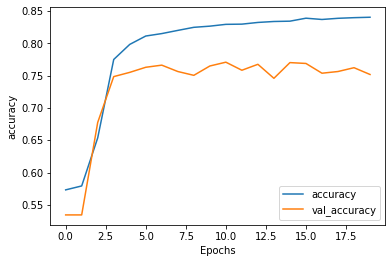

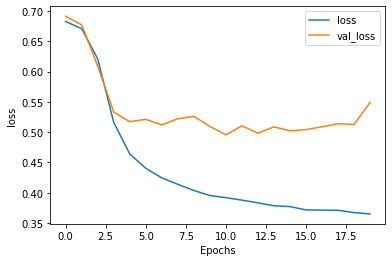

In [18]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

$$ END $$